## Employee Burnout Prediction

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the training dataset
train_data = pd.read_csv(r"C:\Users\hp\Desktop\Data-Science\06. Data Science 3MTT-Modules\Capstone Projects\Capstone 3 - Proactive Insights for Employee Well-being Predicting Burnout with ML\Datasets\train.csv")  

# Displaying first 5 rows
print(train_data.head())

                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   
1                 Yes          1.0                  2.0                   5.0   
2                 Yes          2.0                  NaN                   5.8   
3                 Yes          1.0                  1.0                   2.6   
4                  No          3.0                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52  


In [31]:
# Checking data info (missing values, data types)
print(train_data.info())

# Summary statistics
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
None
        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211   

## Visualizing Data Relationship

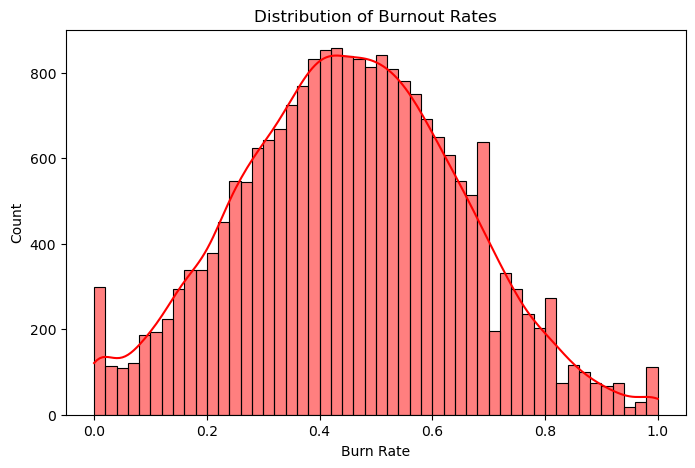

In [32]:
# Histogram for Burn Rate (Target Variable)
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Burn Rate'], kde=True, color='red')
plt.title("Distribution of Burnout Rates")
plt.show()

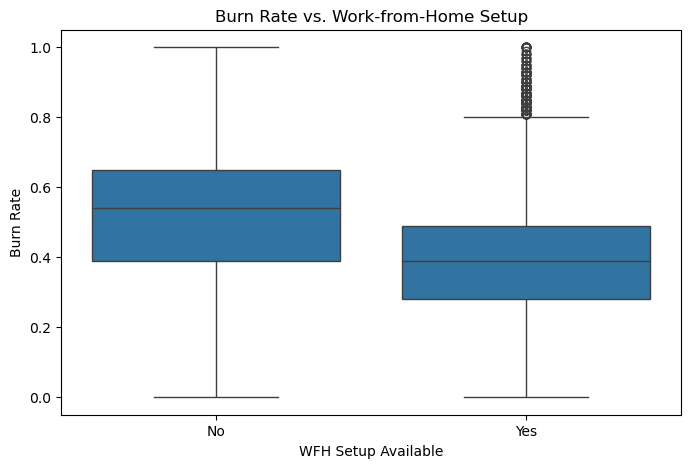

In [33]:
# Boxplot: Burn Rate vs. WFH Setup
plt.figure(figsize=(8, 5))
sns.boxplot(x='WFH Setup Available', y='Burn Rate', data=train_data)
plt.title("Burn Rate vs. Work-from-Home Setup")
plt.show()

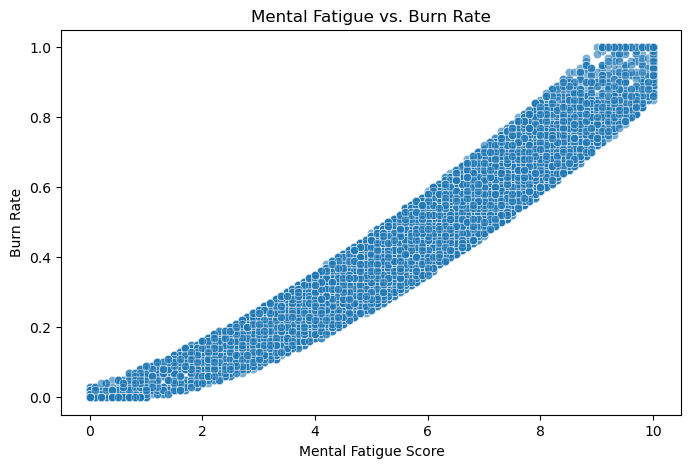

In [34]:
# Scatter Plot: Mental Fatigue vs. Burn Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=train_data, alpha=0.6)
plt.title("Mental Fatigue vs. Burn Rate")
plt.show()

## Checking for Missing Value

In [ ]:
# Checking missing values
print(train_data.isnull().sum())

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [36]:
# Filling missing 'Mental Fatigue Score' with median
train_data['Mental Fatigue Score'].fillna(train_data['Mental Fatigue Score'].median(), inplace=True)

# Filling missing 'Resource Allocation' with mean
train_data['Resource Allocation'].fillna(train_data['Resource Allocation'].mean(), inplace=True)

# Filling missing 'Resource Allocation' with mean
train_data['Burn Rate'].fillna(train_data['Burn Rate'].mean(), inplace=True)

# Verifying no missing values remain
print(train_data.isnull().sum())

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_8340\2694444060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Mental Fatigue Score'].fillna(train_data['Mental Fatigue Score'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8340\2694444060.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

## Data Preprocessing

In [ ]:
# Converting 'Gender' and 'Company Type' into numerical values
train_data['Gender'] = train_data['Gender'].map({'Male': 1, 'Female': 0})
train_data['Company Type'] = train_data['Company Type'].map({'Service': 1, 'Product': 0})

# Checking encoded data
print(train_data[['Gender', 'Company Type']].head())

   Gender  Company Type
0       0             1
1       1             1
2       0             0
3       1             1
4       0             1


## Feature Engineering: Adding Tenure

In [38]:
# Converting 'Date of Joining' to datetime
train_data['Date of Joining'] = pd.to_datetime(train_data['Date of Joining'])

# Lets Calculate tenure (days since joining)
train_data['Tenure'] = (pd.to_datetime('today') - train_data['Date of Joining']).dt.days

# Drop 'Employee ID' and 'Date of Joining' (They are not needed)
train_data.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)

print(train_data.head())

   Gender  Company Type WFH Setup Available  Designation  Resource Allocation  \
0       0             1                  No          2.0             3.000000   
1       1             1                 Yes          1.0             2.000000   
2       0             0                 Yes          2.0             4.481398   
3       1             1                 Yes          1.0             1.000000   
4       0             1                  No          3.0             7.000000   

   Mental Fatigue Score  Burn Rate  Tenure  
0                   3.8       0.16    6115  
1                   5.0       0.36    6054  
2                   5.8       0.49    6319  
3                   2.6       0.20    6081  
4                   6.9       0.52    6183  


In [39]:
## Converting Yes/No in WFH Setup Available column to numeral
train_data['WFH Setup Available'] = train_data['WFH Setup Available'].map({'Yes':1, 'No':0})
print(train_data['WFH Setup Available'].value_counts())

WFH Setup Available
1    12290
0    10460
Name: count, dtype: int64


## Normalizing Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns to scale
numerical_cols = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Tenure']

# Initialize scaler
scaler = MinMaxScaler()

# Applying scaling
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

print(train_data.head())

   Gender  Company Type  WFH Setup Available  Designation  \
0       0             1                    0          0.4   
1       1             1                    1          0.2   
2       0             0                    1          0.4   
3       1             1                    1          0.2   
4       0             1                    0          0.6   

   Resource Allocation  Mental Fatigue Score  Burn Rate    Tenure  
0             0.222222                  0.38       0.16  0.252055  
1             0.111111                  0.50       0.36  0.084932  
2             0.386822                  0.58       0.49  0.810959  
3             0.000000                  0.26       0.20  0.158904  
4             0.666667                  0.69       0.52  0.438356  


## Model Development

In [41]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = train_data.drop('Burn Rate', axis=1)
y = train_data['Burn Rate']

# Split into 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (18200, 7)
Validation set shape: (4550, 7)


## Lets Train Different Models and choose

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Now lets Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [43]:
# Training and evaluating each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}

# Display results
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.3f}, R² = {metrics['R2']:.3f}")

Linear Regression: RMSE = 0.078, R² = 0.831
Random Forest: RMSE = 0.076, R² = 0.838
Gradient Boosting: RMSE = 0.072, R² = 0.856


## Hyperparameter Tuning: Best Model (Gradient Boosting)

In [44]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Tuned Model: RMSE = {rmse:.3f}, R² = {r2:.3f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Tuned Model: RMSE = 0.071, R² = 0.861


## Insights and Recomendations

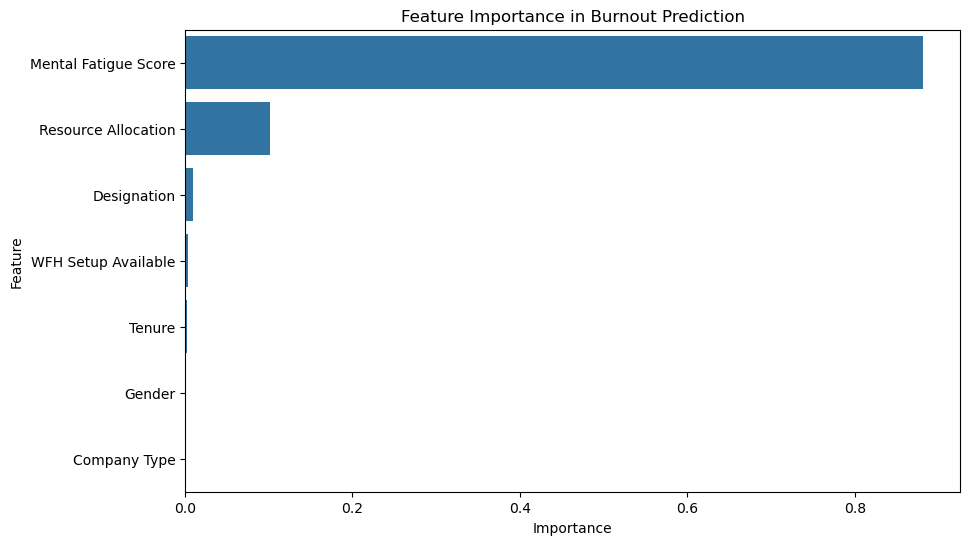

In [46]:
# Geting feature importances
feature_importance = best_model.feature_importances_

# Lets Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Showing Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title("Feature Importance in Burnout Prediction")
plt.show()

## Key Findings:

Mental Fatigue Score is the biggest burnout predictor.

Resource Allocation (work hours) is critical.

WFH Setup helps reduce burnout.

Step 2: Recommendations for Companies
Reduce Excessive Workloads → Limit overtime
Mental Health Support → Counseling & stress management
Flexible Work Arrangements → Encourage WFH
Monitor High-Risk Employees → Early intervention

In [47]:
# Saving my model during development
import joblib
joblib.dump(best_model, 'burnout_model.pkl')

# we can now load it in Streamlit
model = joblib.load('burnout_model.pkl')